# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 14.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 20.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 23.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp22 # use or create a database named demo
tweet_collection = db.final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.719563,-75.079379,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 17:39:47 +0000 2020'
'Sat Dec 12 17:39:39 +0000 2020'
'Sat Dec 12 17:39:30 +0000 2020'
'Sat Dec 12 17:39:27 +0000 2020'
'Sat Dec 12 17:39:26 +0000 2020'
'Sat Dec 12 17:39:23 +0000 2020'
'Sat Dec 12 17:39:15 +0000 2020'
'Sat Dec 12 17:39:14 +0000 2020'
'Sat Dec 12 17:39:14 +0000 2020'
'Sat Dec 12 17:39:09 +0000 2020'
'Sat Dec 12 17:39:04 +0000 2020'
'Sat Dec 12 17:39:01 +0000 2020'
'Sat Dec 12 17:38:59 +0000 2020'
'Sat Dec 12 17:38:58 +0000 2020'
'Sat Dec 12 17:38:54 +0000 2020'
'Sat Dec 12 17:38:45 +0000 2020'
'Sat Dec 12 17:38:40 +0000 2020'
'Sat Dec 12 17:38:39 +0000 2020'
'Sat Dec 12 17:38:28 +0000 2020'
'Sat Dec 12 17:38:16 +0000 2020'
'Sat Dec 12 17:38:12 +0000 2020'
'Sat Dec 12 17:38:08 +0000 2020'
'Sat Dec 12 17:38:08 +0000 2020'
'Sat Dec 12 17:37:56 +0000 2020'
'Sat Dec 12 17:37:45 +0000 2020'
'Sat Dec 12 17:37:43 +0000 2020'
'Sat Dec 12 17:37:16 +0000 2020'
'Sat Dec 12 17:37:13 +0000 2020'
'Sat Dec 12 17:37:03 +0000 2020'
'Sat Dec 12 17:37:01 +0000 2020'
'Sat Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sat Dec 12 15:44:50 +0000 2020'
'Sat Dec 12 15:44:39 +0000 2020'
'Sat Dec 12 15:44:38 +0000 2020'
'Sat Dec 12 15:44:36 +0000 2020'
'Sat Dec 12 15:44:33 +0000 2020'
'Sat Dec 12 15:44:22 +0000 2020'
'Sat Dec 12 15:44:13 +0000 2020'
'Sat Dec 12 15:44:09 +0000 2020'
'Sat Dec 12 15:44:04 +0000 2020'
'Sat Dec 12 15:44:00 +0000 2020'
'Sat Dec 12 15:44:00 +0000 2020'
'Sat Dec 12 15:43:52 +0000 2020'
'Sat Dec 12 15:43:49 +0000 2020'
'Sat Dec 12 15:43:46 +0000 2020'
'Sat Dec 12 15:43:41 +0000 2020'
'Sat Dec 12 15:43:35 +0000 2020'
'Sat Dec 12 15:43:27 +0000 2020'
'Sat Dec 12 15:43:18 +0000 2020'
'Sat Dec 12 15:43:16 +0000 2020'
'Sat Dec 12 15:43:03 +0000 2020'
'Sat Dec 12 15:43:00 +0000 2020'
'Sat Dec 12 15:42:49 +0000 2020'
'Sat Dec 12 15:42:49 +0000 2020'
'Sat Dec 12 15:42:47 +0000 2020'
'Sat Dec 12 15:42:46 +0000 2020'
'Sat Dec 12 15:42:29 +0000 2020'
'Sat Dec 12 15:42:29 +0000 2020'
'Sat Dec 12 15:42:27 +0000 2020'
'Sat Dec 12 15:42:23 +0000 2020'
'Sat Dec 12 15:42:21 +0000 2020'
'Sat Dec 1

'Sat Dec 12 15:21:05 +0000 2020'
'Sat Dec 12 15:20:59 +0000 2020'
'Sat Dec 12 15:20:56 +0000 2020'
'Sat Dec 12 15:20:52 +0000 2020'
'Sat Dec 12 15:20:48 +0000 2020'
'Sat Dec 12 15:20:48 +0000 2020'
'Sat Dec 12 15:20:44 +0000 2020'
'Sat Dec 12 15:20:44 +0000 2020'
'Sat Dec 12 15:20:39 +0000 2020'
'Sat Dec 12 15:20:39 +0000 2020'
'Sat Dec 12 15:20:37 +0000 2020'
'Sat Dec 12 15:20:37 +0000 2020'
'Sat Dec 12 15:20:31 +0000 2020'
'Sat Dec 12 15:20:30 +0000 2020'
'Sat Dec 12 15:20:28 +0000 2020'
'Sat Dec 12 15:20:21 +0000 2020'
'Sat Dec 12 15:20:10 +0000 2020'
'Sat Dec 12 15:20:04 +0000 2020'
'Sat Dec 12 15:20:03 +0000 2020'
'Sat Dec 12 15:20:02 +0000 2020'
'Sat Dec 12 15:19:43 +0000 2020'
'Sat Dec 12 15:19:43 +0000 2020'
'Sat Dec 12 15:19:34 +0000 2020'
'Sat Dec 12 15:19:30 +0000 2020'
'Sat Dec 12 15:19:27 +0000 2020'
'Sat Dec 12 15:19:25 +0000 2020'
'Sat Dec 12 15:19:24 +0000 2020'
'Sat Dec 12 15:19:18 +0000 2020'
'Sat Dec 12 15:19:14 +0000 2020'
'Sat Dec 12 15:19:12 +0000 2020'
'Sat Dec 1

'Sat Dec 12 15:06:36 +0000 2020'
'Sat Dec 12 15:06:18 +0000 2020'
'Sat Dec 12 15:06:17 +0000 2020'
'Sat Dec 12 15:06:16 +0000 2020'
'Sat Dec 12 15:06:12 +0000 2020'
'Sat Dec 12 15:06:11 +0000 2020'
'Sat Dec 12 15:06:02 +0000 2020'
'Sat Dec 12 15:05:47 +0000 2020'
'Sat Dec 12 15:05:43 +0000 2020'
'Sat Dec 12 15:05:39 +0000 2020'
'Sat Dec 12 15:05:36 +0000 2020'
'Sat Dec 12 15:05:33 +0000 2020'
'Sat Dec 12 15:05:27 +0000 2020'
'Sat Dec 12 15:05:25 +0000 2020'
'Sat Dec 12 15:05:19 +0000 2020'
'Sat Dec 12 15:05:11 +0000 2020'
'Sat Dec 12 15:05:10 +0000 2020'
'Sat Dec 12 15:05:08 +0000 2020'
'Sat Dec 12 15:05:03 +0000 2020'
'Sat Dec 12 15:04:57 +0000 2020'
'Sat Dec 12 15:04:53 +0000 2020'
'Sat Dec 12 15:04:53 +0000 2020'
'Sat Dec 12 15:04:48 +0000 2020'
'Sat Dec 12 15:04:44 +0000 2020'
'Sat Dec 12 15:04:42 +0000 2020'
'Sat Dec 12 15:04:40 +0000 2020'
'Sat Dec 12 15:04:39 +0000 2020'
'Sat Dec 12 15:04:37 +0000 2020'
'Sat Dec 12 15:04:29 +0000 2020'
'Sat Dec 12 15:04:27 +0000 2020'
'Sat Dec 1

'Sat Dec 12 14:42:35 +0000 2020'
'Sat Dec 12 14:42:34 +0000 2020'
'Sat Dec 12 14:42:29 +0000 2020'
'Sat Dec 12 14:42:23 +0000 2020'
'Sat Dec 12 14:42:21 +0000 2020'
'Sat Dec 12 14:42:20 +0000 2020'
'Sat Dec 12 14:42:20 +0000 2020'
'Sat Dec 12 14:42:16 +0000 2020'
'Sat Dec 12 14:42:16 +0000 2020'
'Sat Dec 12 14:42:14 +0000 2020'
'Sat Dec 12 14:42:12 +0000 2020'
'Sat Dec 12 14:42:03 +0000 2020'
'Sat Dec 12 14:41:48 +0000 2020'
'Sat Dec 12 14:41:31 +0000 2020'
'Sat Dec 12 14:41:26 +0000 2020'
'Sat Dec 12 14:41:18 +0000 2020'
'Sat Dec 12 14:41:15 +0000 2020'
'Sat Dec 12 14:41:06 +0000 2020'
'Sat Dec 12 14:41:05 +0000 2020'
'Sat Dec 12 14:40:59 +0000 2020'
'Sat Dec 12 14:40:53 +0000 2020'
'Sat Dec 12 14:40:52 +0000 2020'
'Sat Dec 12 14:40:34 +0000 2020'
'Sat Dec 12 14:40:31 +0000 2020'
'Sat Dec 12 14:40:23 +0000 2020'
'Sat Dec 12 14:40:21 +0000 2020'
'Sat Dec 12 14:40:19 +0000 2020'
'Sat Dec 12 14:40:18 +0000 2020'
'Sat Dec 12 14:40:18 +0000 2020'
'Sat Dec 12 14:40:17 +0000 2020'
'Sat Dec 1

'Sat Dec 12 14:17:57 +0000 2020'
'Sat Dec 12 14:17:45 +0000 2020'
'Sat Dec 12 14:17:36 +0000 2020'
'Sat Dec 12 14:17:28 +0000 2020'
'Sat Dec 12 14:17:22 +0000 2020'
'Sat Dec 12 14:17:21 +0000 2020'
'Sat Dec 12 14:17:18 +0000 2020'
'Sat Dec 12 14:17:16 +0000 2020'
'Sat Dec 12 14:17:11 +0000 2020'
'Sat Dec 12 14:17:07 +0000 2020'
'Sat Dec 12 14:17:03 +0000 2020'
'Sat Dec 12 14:17:03 +0000 2020'
'Sat Dec 12 14:17:02 +0000 2020'
'Sat Dec 12 14:16:59 +0000 2020'
'Sat Dec 12 14:16:35 +0000 2020'
'Sat Dec 12 14:16:33 +0000 2020'
'Sat Dec 12 14:16:27 +0000 2020'
'Sat Dec 12 14:16:20 +0000 2020'
'Sat Dec 12 14:16:19 +0000 2020'
'Sat Dec 12 14:16:11 +0000 2020'
'Sat Dec 12 14:16:10 +0000 2020'
'Sat Dec 12 14:16:07 +0000 2020'
'Sat Dec 12 14:15:58 +0000 2020'
'Sat Dec 12 14:15:50 +0000 2020'
'Sat Dec 12 14:15:50 +0000 2020'
'Sat Dec 12 14:15:48 +0000 2020'
'Sat Dec 12 14:15:37 +0000 2020'
'Sat Dec 12 14:15:32 +0000 2020'
'Sat Dec 12 14:15:27 +0000 2020'
'Sat Dec 12 14:15:22 +0000 2020'
'Sat Dec 1

'Sat Dec 12 14:00:24 +0000 2020'
'Sat Dec 12 14:00:22 +0000 2020'
'Sat Dec 12 14:00:13 +0000 2020'
'Sat Dec 12 14:00:13 +0000 2020'
'Sat Dec 12 14:00:12 +0000 2020'
'Sat Dec 12 14:00:11 +0000 2020'
'Sat Dec 12 14:00:10 +0000 2020'
'Sat Dec 12 14:00:06 +0000 2020'
'Sat Dec 12 14:00:04 +0000 2020'
'Sat Dec 12 14:00:03 +0000 2020'
'Sat Dec 12 14:00:01 +0000 2020'
'Sat Dec 12 14:00:01 +0000 2020'
'Sat Dec 12 14:00:01 +0000 2020'
'Sat Dec 12 14:00:01 +0000 2020'
'Sat Dec 12 14:00:01 +0000 2020'
'Sat Dec 12 14:00:00 +0000 2020'
'Sat Dec 12 13:59:56 +0000 2020'
'Sat Dec 12 13:59:54 +0000 2020'
'Sat Dec 12 13:59:53 +0000 2020'
'Sat Dec 12 13:59:51 +0000 2020'
'Sat Dec 12 13:59:46 +0000 2020'
'Sat Dec 12 13:59:45 +0000 2020'
'Sat Dec 12 13:59:43 +0000 2020'
'Sat Dec 12 13:59:42 +0000 2020'
'Sat Dec 12 13:59:39 +0000 2020'
'Sat Dec 12 13:59:32 +0000 2020'
'Sat Dec 12 13:59:28 +0000 2020'
'Sat Dec 12 13:59:23 +0000 2020'
'Sat Dec 12 13:59:21 +0000 2020'
'Sat Dec 12 13:59:19 +0000 2020'
'Sat Dec 1

'Sat Dec 12 13:41:05 +0000 2020'
'Sat Dec 12 13:41:03 +0000 2020'
'Sat Dec 12 13:40:46 +0000 2020'
'Sat Dec 12 13:40:43 +0000 2020'
'Sat Dec 12 13:40:41 +0000 2020'
'Sat Dec 12 13:40:35 +0000 2020'
'Sat Dec 12 13:40:34 +0000 2020'
'Sat Dec 12 13:40:33 +0000 2020'
'Sat Dec 12 13:40:18 +0000 2020'
'Sat Dec 12 13:40:14 +0000 2020'
'Sat Dec 12 13:40:10 +0000 2020'
'Sat Dec 12 13:40:08 +0000 2020'
'Sat Dec 12 13:39:59 +0000 2020'
'Sat Dec 12 13:39:55 +0000 2020'
'Sat Dec 12 13:39:47 +0000 2020'
'Sat Dec 12 13:39:41 +0000 2020'
'Sat Dec 12 13:39:24 +0000 2020'
'Sat Dec 12 13:39:20 +0000 2020'
'Sat Dec 12 13:39:17 +0000 2020'
'Sat Dec 12 13:39:16 +0000 2020'
'Sat Dec 12 13:39:05 +0000 2020'
'Sat Dec 12 13:38:56 +0000 2020'
'Sat Dec 12 13:38:49 +0000 2020'
'Sat Dec 12 13:38:43 +0000 2020'
'Sat Dec 12 13:38:35 +0000 2020'
'Sat Dec 12 13:38:29 +0000 2020'
'Sat Dec 12 13:38:21 +0000 2020'
'Sat Dec 12 13:38:12 +0000 2020'
'Sat Dec 12 13:38:09 +0000 2020'
'Sat Dec 12 13:38:07 +0000 2020'
'Sat Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3064
2671


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: NYC Health + Hospitals
text: Getting answers about #COVID19 is one easy-to-remember phone call away. Call 212-COVID19 if you have questions, wan… https://t.co/LdkTgZ3KNl
----
name: Sandra 🇺🇸 (@🏠)
text: @cherannJAFM Covid19.
----
name: Nadine S.Evans/ Siracusa
text: I have not gone for a Covid19 test.
----
name: A4JR
text: NRB - Covid19 PSA 15s
----
name: El T
text: #COVID19 https://t.co/E3vcjztk4h
----
name: Stanley
text: #COVID19 https://t.co/xh0WDHHdmv
----
name: Tomas Vera🏞️
text: @cherannJAFM COVID19. The gift that keeps on giving.
----
name: Tosia Proud to Live In An Anarchist Jurisdiction
text: @critigal1 Two of my sisters died from COVID19.
----
name: JP, RN *Wear a Damn Mask*
text: #COVID19 https://t.co/Ht4v0XWFAl
----
name: A Football Friend
text: What. Are. We. Doing?

#Covid19 https://t.co/drKTsjAOlC


In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status,retweeted_status
0,5fd5043b245778801a524e58,Sat Dec 12 17:00:01 +0000 2020,1337804411528163329,1337804411528163329,Getting answers about #COVID19 is one easy-to-...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://ads.twitter.com"" rel=""nofollo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,5fd5048e245778801a5253db,Sat Dec 12 15:05:08 +0000 2020,1337775499079127040,1337775499079127040,@cherannJAFM Covid19.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337507e+18,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
2,5fd50494245778801a525613,Sat Dec 12 14:14:03 +0000 2020,1337762644065984513,1337762644065984513,I have not gone for a Covid19 test.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
3,5fd50490245778801a5254a1,Sat Dec 12 14:47:36 +0000 2020,1337771085635477506,1337771085635477506,NRB - Covid19 PSA 15s,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'et', 'result_type': 're...","<a href=""https://radio.co"" rel=""nofollow"">Radi...",NaN,...,0,False,False,NaN,et,NaN,NaN,NaN,NaN,NaN
4,5fd50490245778801a525490,Sat Dec 12 14:49:46 +0000 2020,1337771634523041792,1337771634523041792,#COVID19 https://t.co/E3vcjztk4h,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,False,und,"{'media': [{'id': 1337771630802722820, 'id_str...",NaN,NaN,NaN,NaN
5,5fd5048c245778801a525312,Sat Dec 12 15:17:02 +0000 2020,1337778492558209024,1337778492558209024,#COVID19 https://t.co/xh0WDHHdmv,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,und,NaN,1.337775e+18,1337775214029991936,{'created_at': 'Sat Dec 12 15:04:00 +0000 2020...,NaN
6,5fd5048a245778801a525246,Sat Dec 12 15:32:45 +0000 2020,1337782448759820289,1337782448759820289,@cherannJAFM COVID19. The gift that keeps on g...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337507e+18,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
7,5fd5043b245778801a524e38,Sat Dec 12 17:01:24 +0000 2020,1337804758594314242,1337804758594314242,@critigal1 Two of my sisters died from COVID19.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337591e+18,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
8,5fd50438245778801a524d30,Sat Dec 12 17:19:26 +0000 2020,1337809297217089540,1337809297217089540,#COVID19 https://t.co/Ht4v0XWFAl,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,False,und,NaN,1.337807e+18,1337806747738763266,{'created_at': 'Sat Dec 12 17:09:18 +0000 2020...,NaN
9,5fd50437245778801a524cf1,Sat Dec 12 17:24:37 +0000 2020,1337810602534838273,1337810602534838273,What. Are. We. Doing?\n\n#Covid19 https://t.co...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://tapbots.com/tweetbot"" rel=""nof...",NaN,...,0,False,False,False,en,NaN,1.337801e+18,1337800861456723972,{'created_at': 'Sat Dec 

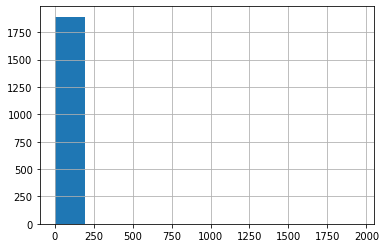

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count